<a href="https://colab.research.google.com/github/theDakshJaitly/BitcoinLinReg/blob/main/Crypto_LinearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv("BTC-INR.csv")

# Convert 'Date' column to datetime objects and then to ordinal values
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime
df['Date'] = df['Date'].apply(lambda date: date.toordinal()) # Convert to ordinal

# Split the data first
X = df[['Date']].values  # Feature (Date in numeric form)
y = df['Close'].values  # Target (Close price)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data (fit the scaler only on the training data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model with scaled data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (after scaling): {mse}")


Mean Squared Error (after scaling): 618499990531.9396


In [ ]:
print(X_train_scaled)

[[ 0.59324025]
 [-1.48338694]
 [ 1.13805879]
 ...
 [ 0.04526334]
 [ 0.30424955]
 [-0.38111638]]


<function matplotlib.pyplot.show(close=None, block=None)>

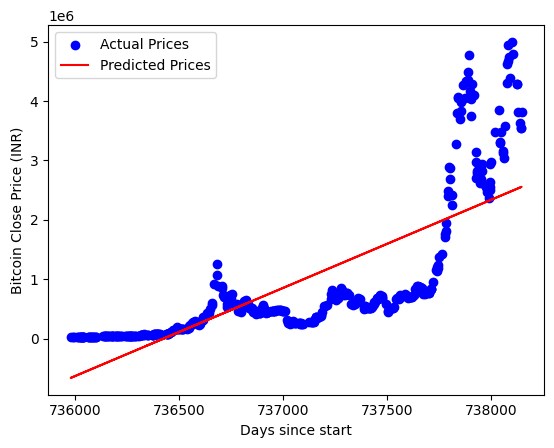

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', label='Predicted Prices')
plt.xlabel('Days since start')
plt.ylabel('Bitcoin Close Price (INR)')
plt.legend()
plt.show


In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(max_depth=5)
tree_model.fit(X_train_scaled, y_train)

y_pred_tree = tree_model.predict(X_test_scaled)

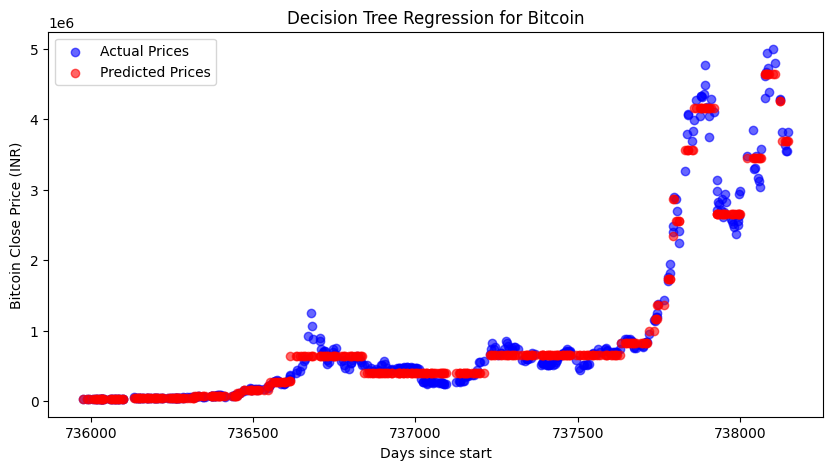

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices', alpha=0.6)
plt.scatter(X_test, y_pred_tree, color='red', label='Predicted Prices', alpha=0.6)
plt.xlabel('Days since start')
plt.ylabel('Bitcoin Close Price (INR)')
plt.title('Decision Tree Regression for Bitcoin')
plt.legend()
plt.show()

In [ ]:
print(f"Mean Squared Error (after scaling): {mse}")

Mean Squared Error (after scaling): 618499990531.9396


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred_tree)

mse = mean_squared_error(y_test, y_pred_tree)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred_tree)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² (Coefficient of Determination): {r2}")

Mean Absolute Error (MAE): 79442.44802880209
Mean Squared Error (MSE): 15602125748.367321
Root Mean Squared Error (RMSE): 124908.46948212647
R² (Coefficient of Determination): 0.989571507385348


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

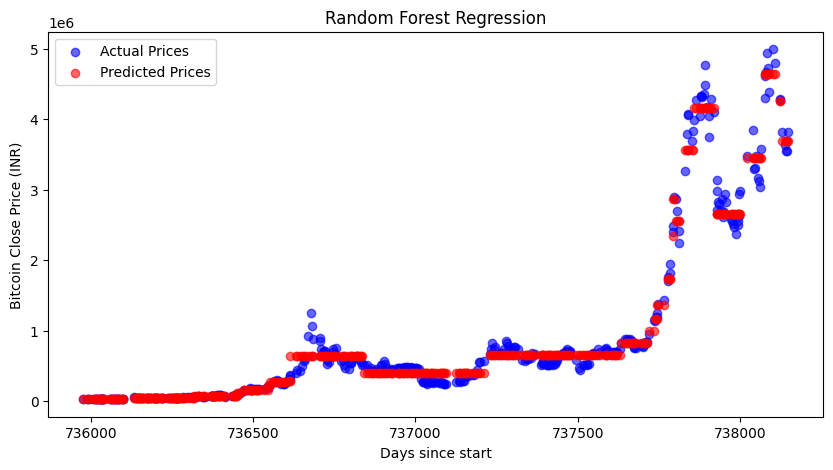

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices', alpha=0.6)
plt.scatter(X_test, y_pred_tree, color='red', label='Predicted Prices', alpha=0.6)
plt.xlabel('Days since start')
plt.ylabel('Bitcoin Close Price (INR)')
plt.title('Random Forest Regression')
plt.legend()
plt.show()

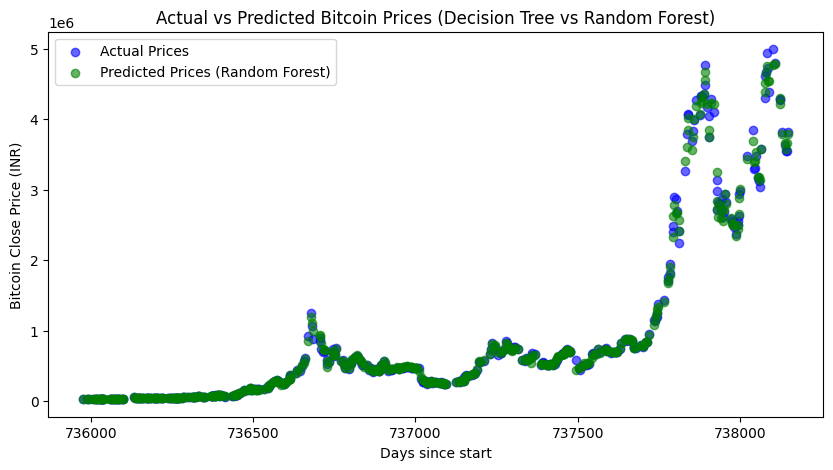

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))


plt.scatter(X_test, y_test, color='blue', label='Actual Prices', alpha=0.6)

#plt.scatter(X_test, y_pred_tree, color='red', label='Predicted Prices (Decision Tree)', alpha=0.6)

plt.scatter(X_test, y_pred_rf, color='green', label='Predicted Prices (Random Forest)', alpha=0.6)

plt.xlabel('Days since start')
plt.ylabel('Bitcoin Close Price (INR)')
plt.title('Actual vs Predicted Bitcoin Prices (Decision Tree vs Random Forest)')

plt.legend()

plt.show()